In [ ]:
#I want to go to a Resutrant
#Some where thats close, open and Chinese, Japanese or Greek
#also not too expensive


In [54]:
# (close and open and cheap) and (Greek or Japenese or Chinese)#

In [5]:
from qiskit_aer import qasm_simulator, Aer
from qiskit_algorithms import Grover, AmplificationProblem
from qiskit.circuit.library import PhaseOracle
from qiskit.visualization import plot_histogram
from qiskit.primitives import Sampler

In [7]:
log_expr = '((chinese & ~japanese & ~greek) | (~chinese & japanese & ~greek) | (~chinese & ~japanese & greek)) & (close & open & cheap)'
oracle = PhaseOracle(log_expr)
problem = AmplificationProblem(oracle)

In [8]:
backend = Aer.get_backend('qasm_simulator')
sampler = Sampler()

C:\Users\Morik\AppData\Local\Temp\ipykernel_15260\1630342758.py:2: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


In [9]:
grover = Grover(sampler=sampler)
result = grover.amplify(problem)

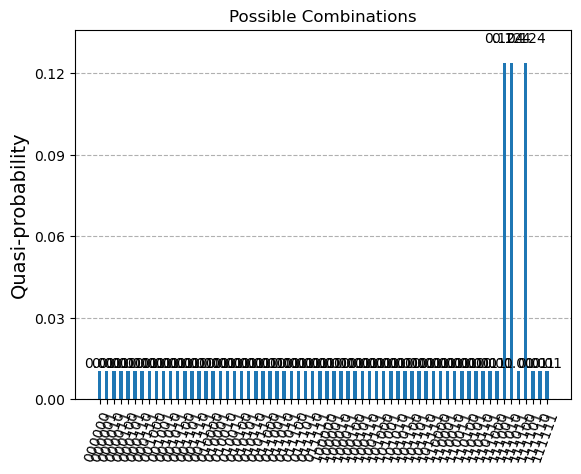

In [60]:
plot_histogram(result.circuit_results, title='Possible Combinations', bar_labels=True)
#From top to bottom, the bits represent the following:
#The strings signify from top to bottom: Chinese, Japanese, Greek, Close, Open, Cheap

In [63]:
print(result.top_measurement) 

111001


In [64]:
top_measurement = result.top_measurement

# Interpret the result
if top_measurement == '111001':
    print("Chinese")
elif top_measurement == '111010':
    print("Japanese")
elif top_measurement == '111100':
    print("Greek")
else:
    print("No suitable restaurant found")

Chinese


Quantum Hardware

In [10]:
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
backend_name='ibm_kyiv'
backend=QiskitRuntimeService().backend(backend_name)
pass_manager=generate_preset_pass_manager(optimization_level=1, backend=backend)
sampler=Sampler(backend)

In [16]:
from qiskit import transpile

# Transpile the circuit to match the target hardware definition
transpiled_circuit = transpile(problem.oracle, backend=backend, optimization_level=1)

# Update the problem with the transpiled circuit
problem.oracle = transpiled_circuit

# Run the Grover algorithm with the transpiled circuit
grover = Grover(sampler=sampler)
job = sampler.run([transpiled_circuit], shots=100)
job_id = job.job_id()
print(job_id)

c:\Users\Morik\OneDrive\Work\Qiskit\qiskit141env\Lib\site-packages\qiskit_ibm_runtime\utils\validations.py:40: UserWarning: The 0-th circuit has no output classical registers so the result will be empty. Did you mean to add measurement instructions?
  warnings.warn(


czd35pytp60g008hh6b0


In [18]:
service=QiskitRuntimeService()
job_id='czd35pytp60g008hh6b0'        #insert job_id here
job=service.job(job_id)
print(job)

<RuntimeJobV2('czd35pytp60g008hh6b0', 'sampler')>


In [19]:
print(job.result())
job_result=job.result()

PrimitiveResult([SamplerPubResult(data=DataBin(), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-03-19 02:58:39', stop='2025-03-19 02:58:40', size=100>)])}, 'version': 2})


In [25]:
# Assuming 'job_result' is your PrimitiveResult object
if len(job_result.results) > 0:
	quasi_dist = job_result.results[0].quasi_dists[0]  # Get the first quasi distribution

	# Convert quasi distribution to counts
	counts = quasi_dist.binary_probabilities()

	# Print results
	print(counts)
else:
	print("No results found in job_result")

# Notice the slight error, this is due to quantum noise #

AttributeError: 'PrimitiveResult' object has no attribute 'results'